# Perceptron

## Setup

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

## Model

You can build the perceptron directly, or use the `glm_generative` model builder.

In [2]:
from tramp.experiments import BayesOptimalScenario, qplot, plot_compare
from tramp.models import glm_generative

f_0 BinaryPrior(size=1000,p_pos=0.5)
f_1 LinearChannel(name=F,Nx=1700,Nz=1000,precompute_svd=True)
f_2 SgnLikelihood(y_name=y,size=1700)


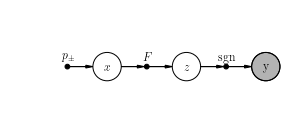

In [3]:
alpha = 1.7
N = 1000
teacher = glm_generative(
    N=N, alpha=alpha, ensemble_type="gaussian", prior_type="binary", 
    output_type="sgn"
)

scenario = BayesOptimalScenario(teacher, x_ids=["x"])
scenario.setup()
scenario.student.plot()

for factor in scenario.student.factors:
    print(factor.id, factor)

## EP dynamics

In [4]:
from tramp.algos import EarlyStoppingEP
ep_evo = scenario.ep_convergence(
    metrics=["mse"], max_iter=30, callback=EarlyStoppingEP()
)

INFO:tramp.algos.message_passing:init message dag with ConstantInit(a=0,b=0)
INFO:tramp.algos.message_passing:no damping
INFO:tramp.algos.callbacks:increase=0.7402193478791699 above max_increase=2.00e-01
INFO:tramp.algos.callbacks:restoring old message dag
INFO:tramp.algos.message_passing:terminated after n_iter=14 iterations


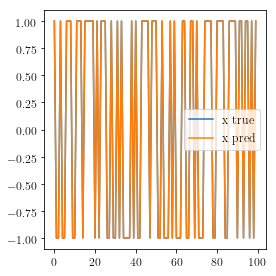

In [5]:
plot_compare(scenario.x_true["x"], scenario.x_pred["x"])

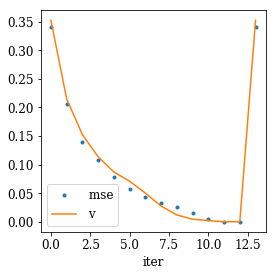

In [6]:
qplot(
    ep_evo, x="iter", y=["mse", "v"],  
    y_markers=[".","-"], y_legend=True
)

## Compare EP vs SE

See `data/perceptron_ep_vs_se.py`

In [7]:
rename = {
    "alpha": r"$\alpha$", "n_iter":"iterations", "p_pos":r"$p_+$", "source=":""
}
df = pd.read_csv("data/perceptron_ep_vs_se.csv")

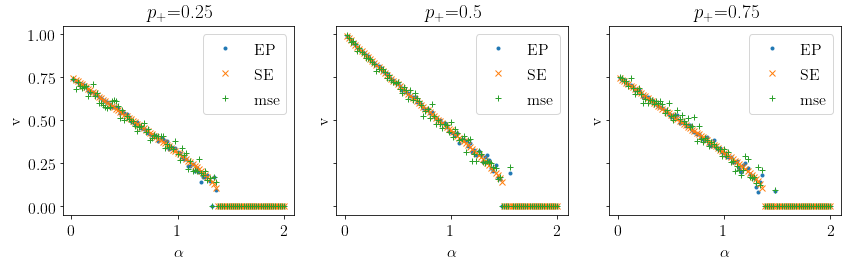

In [8]:
qplot(
    df, x="alpha", y="v", marker="source", column="p_pos", 
    rename=rename, usetex=True, font_size=16
)

## Phase transition

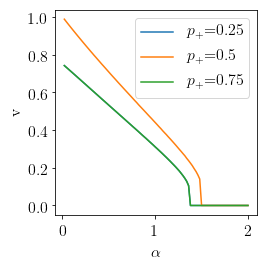

In [9]:
qplot(
    df.query("source=='SE'"), x="alpha", y="v", color="p_pos",
    rename=rename, usetex=True, font_size=16
)

## Nbr of iterations diverging at the critical value

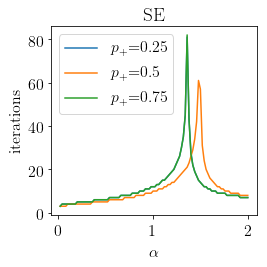

In [10]:
qplot(
    df.query("source=='SE'"), 
    x="alpha", y="n_iter", color="p_pos", column="source",
    rename=rename, usetex=True, font_size=16
)